In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = 'SalePrice'
col_train = train[col]


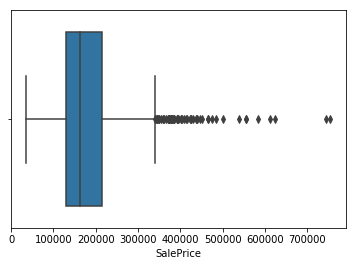

In [6]:
sns.boxplot(col_train)

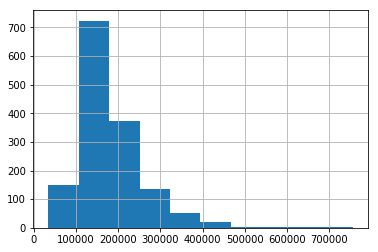

In [7]:
col_train.hist()

### SalePrice according to MSSubClass

In [30]:
cols = ['MSSubClass', 'SalePrice']
aggr = {
    'SalePrice': {
        'avg_price': 'mean'
    }
}
groupby = train[cols].groupby('MSSubClass').mean()
groupby.sort_values('SalePrice')

,SalePrice
MSSubClass,
30,95829.724638
180,102300.000000
45,108591.666667
190,129613.333333
90,133541.076923
160,138647.380952
50,143302.972222
85,147810.000000
40,156125.000000


### Write a transformer to one-hot encode this feature

In [54]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import category_encoders as ce

class MSSubClassTransformer(TransformerMixin):
    """
    one-hot encoded this feature because it is categorical
    instead of recognize it as an int feature
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        col = 'MSSubClass'
        dummy = pd.get_dummies(X[col], prefix=col)
        drop_col = X.drop(col, axis=1)
        df = pd.concat([dummy, drop_col], axis=1)
        return df
        
# test
pipe = Pipeline([
    ('transformer', MSSubClassTransformer())
])
transformed = pipe.transform(train[cols])
transformed.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,208500
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181500
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,223500
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,140000
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,250000


not using ColumnTransformer from sklearn.compose because it does not return dataframe but ndarray